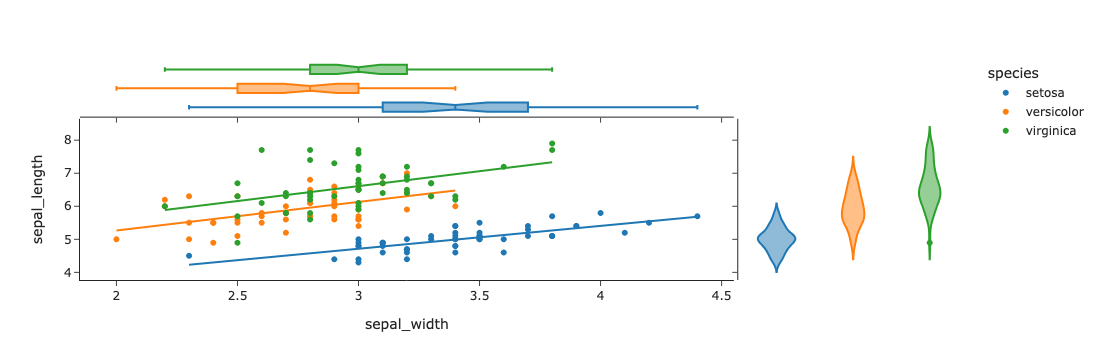

In [2]:
#| label: test-figure

import plotly.express as px
import plotly.io as pio
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", 
                 marginal_y="violin", marginal_x="box", 
                 trendline="ols", template="simple_white")

fig.show()


# Imports

In [17]:
#| label: imports
import requests
import pandas as pd
import os.path

from collections import namedtuple

# Get data
## data fetching functions

In [20]:
def get_from_url(url: str,
                 filename: str,
                 force_csv: bool=False,
                 verbose: bool =False, **_) -> pd.DataFrame:
    """Read, write locally, and parse with pandas a remote csv from its url.
    Args:
        url (str): The data's url.
        filename (str): The filename where the data will be written. Should be a .csv file.
    Returns:
        pd.DataFrame: The data inside a dataframe.
    """
    if force_csv and "&format=csvfile" not in url:
        url += "&format=csvfile"

    # headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:136.0) Gecko/20100101 Firefox/136.0"}

    if verbose:
        print("fetching", url, "...")
    with requests.get(url, stream=True) as response:
        response.raise_for_status()
        with open(filename, "wb") as csv:
            for chunk in response.iter_content(4096):
                csv.write(chunk)
        df = pd.read_csv(filename)
    return df

def get_data(url: str, filename: str, force_refresh: bool=False, verbose: bool =False, **kwargs) -> pd.DataFrame:
    if verbose: print("getting dataset:", url, "file:", filename)
    if force_refresh or not os.path.isfile(filename):
        return get_from_url(url, "DATA/"+filename, verbose=verbose, **kwargs)
    return pd.read_csv("DATA/" + filename)



## datasets

In [21]:

DATASETS = [
    {
        "name": "Gender wage gap",

        "url": "https://sdmx.oecd.org/public/rest/data/OECD.WISE.WDP,DSD_HSL@DF_HSL_CWB,1.1/.2_2...._T./all?startPeriod=2010&dimensionAtObservation=AllDimensions&format=csvfile",
        "force_csv": False,
        "filename": "gender_wage_gap.csv",
    },
    {
        "name": "Productivity levels",
        "url": "https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_PDB@DF_PDB_LV,1.0/.A.......?startPeriod=2020&dimensionAtObservation=AllDimensions&format=csvfile",
        "force_csv": False,
        "filename": "productivity_levels.csv"
    },
]

In [35]:
get_data(**DATASETS[0])

,DATAFLOW,REF_AREA,MEASURE,UNIT_MEASURE,AGE,SEX,EDUCATION_LEV,DOMAIN,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),AUS,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2010,14.042934,A,0,2,_Z
1,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),AUS,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2011,15.966387,A,0,2,_Z
2,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),AUS,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2012,13.750000,A,0,2,_Z
3,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),AUS,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2013,18.000000,A,0,2,_Z
4,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),AUS,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2014,15.773354,A,0,2,_Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),ROU,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2018,3.496503,A,0,2,_Z
450,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),ROU,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2019,5.855397,A,0,2,_Z
451,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),ROU,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2020,3.304181,A,0,2,_Z
452,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB(1.1),ROU,2_2,PT_WG_SAL_M_D,_T,_T,_T,HSL_2,2021,5.755499,A,0,2,_Z


In [42]:
print(os.getcwd())

/Users/oscarplaisant/devoirs/projets/M1_LOGOS/analyse_exploratoire_donnees/projet_1
